In [1]:
%reset -f

from PIL import Image

import numpy as np
from sklearn.cluster import KMeans

import os
os.system('rm guy_*'); # remove all existing images resulting from previous manipulations

In [2]:
# load the image and get its size in pixels

im = Image.open('guy.jpg')
pix = im.load()

xp = im.size[0]
yp = im.size[1]

print 'The image is', xp, 'by', yp, 'pixels'

The image is 466 by 411 pixels


In [3]:
# each pixel has RGB values -----> rgb = [R_value, G_value, B_value]
# get the RGB calues for each pixel

imagePixels = []

for i in range(xp):
    thisRow = []
    for j in range(yp):
        thisRow.append(pix[i,j])
    imagePixels.append(thisRow)
        
imagePixels = np.array(imagePixels)

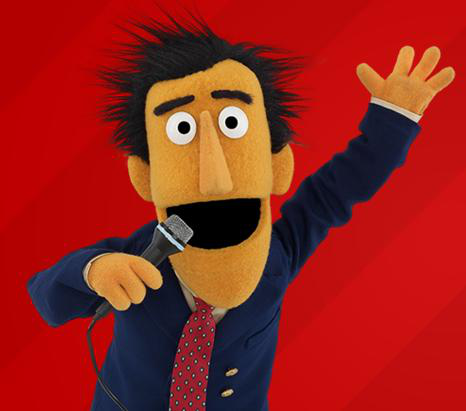

In [4]:
# display the original image
im

In [5]:
# assign the average of the RGB values to each pixel -----> rgb = [mean(rgb),mean(rgb),mean(rgb)]

for i in range(xp):
    for j in range(yp):
        mm = int(np.mean(imagePixels[i,j]))
        pix[i,j] = (mm ,mm, mm)

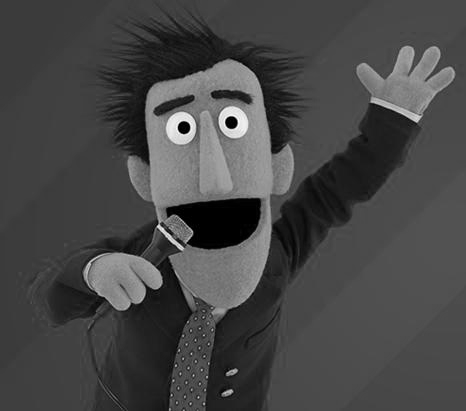

In [6]:
# display image with averaged RGB values
im

### Color Reduction

In [7]:
# function to unroll a 3D array into a 2D array

def unrollArray(arr):
    resArr = []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            resArr.append(list(arr[i,j]))
    return np.array(resArr)

In [8]:
# the unrolled 2D array
unrolledImagePixels = unrollArray(imagePixels)

In [9]:
# cluster the RGB values of the pixels

numClust = 3 # number of clusters

theClusterModel = KMeans(n_clusters=numClust)
theClusterModel.fit(unrolledImagePixels)

theCenters = theClusterModel.cluster_centers_
theLabels = theClusterModel.labels_

In [10]:
# reshape the resulting cluster labels into a 2D array (the same shape as the unrolled image pixel values)
imagePixelLabels = theLabels.reshape(xp,yp)

In [11]:
# replace the RGB value of each pixel with the value of the centroid of its cluster
for i in range(xp):
    for j in range(yp):
        ind = imagePixelLabels[i,j]
        pix[i,j] = tuple([int(k) for k in theCenters[ind]])

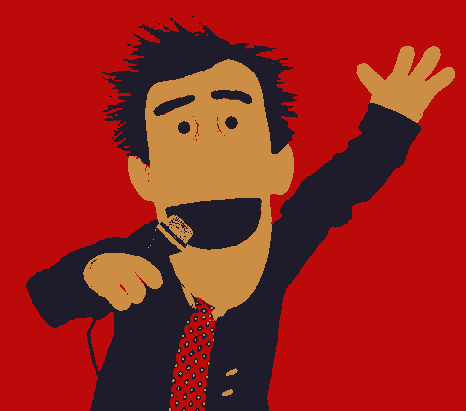

In [12]:
# display image with cluster-center RGB values
im